In [58]:
import json
import pandas as pd
import numpy as np
import networkx as nx
import jellyfish
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from fuzzywuzzy import fuzz

In [3]:
with open('spark_dependency_results.json') as f:
    spark_results = json.load(f)


In [4]:
print(len(spark_results['schemaVersion']))
print(len(spark_results['name']))
print(len(spark_results['variables']))
print(len(spark_results['cells']))

3
29
1106
4313


In [5]:
len(spark_results)
#spark_df = pd.DataFrame(spark_results)

4

In [157]:
#spark_results['variables']
main_dict = {}
main_dict_counter = 0
dict_array = []
for element in spark_results['variables']:
    element = element.split('\\')
    #print(element)
    for value in element:
        if value not in main_dict:
            main_dict[value] = {}
            main_dict[value]['counter'] = main_dict_counter
            main_dict[value]['contains_array'] = []
            main_dict_counter += 1
    for i in range(len(element)-1):
        #print(element[i])
        #print(element[i+1])
        #print(i)
        if main_dict[element[i+1]]['counter'] not in main_dict[element[i]]['contains_array']:
            main_dict[element[i]]['contains_array'].append(main_dict[element[i+1]]['counter'])
            
        
    
## Uncomment below to see the real file path and string


#spark_results['variables']
#main_dict = {}
#main_dict_counter = 0
#dict_array = []
#for element in spark_results['variables']:
#    element = element.split('\\')
#    #print(element)
#    for value in element:
#        if value not in main_dict:
#            main_dict[value] = {}
#            main_dict[value]['counter'] = main_dict_counter
#            main_dict[value]['contains_array'] = []
#            main_dict_counter += 1
#    for i in range(len(element)-1):
#        #print(element[i])
#       #print(element[i+1])
#        #print(i)
#        if element[i+1] not in main_dict[element[i]]['contains_array']:
#            main_dict[element[i]]['contains_array'].append(element[i+1])
            

In [158]:
#spark_results
print(main_dict_counter)
#print(len(main_dict['kvstore']['contains_array'][0]))
#for element in main_dict['kvstore']['contains_array']:
    #print(element)
#print((main_dict['kvstore']['contains_array'][0][0]))

main_dict['kvstore']['contains_array']

1038


[7,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

In [204]:
## Creating rsf file
f = open('test_a.rsf', 'w')
for element in main_dict:
    #print(element)
    for value in main_dict[element]['contains_array']:
        #print(value)
        string = "contain " + str(element) + " " + str(value) + "\n"
        f.write(string)

#f.write('test')
f.close()

In [23]:
index  = 0
var_array = []
for value in spark_results['variables']:
    var_array.append([index, value])
    #print(index, value)
    index += 1

In [24]:
var_df = pd.DataFrame(var_array)
var_df.columns = ['index_val', 'name']
var_df.head()

,index_val,name
0,0,C:\Users\tanji\Desktop\spark-master\common\kvs...
1,1,C:\Users\tanji\Desktop\spark-master\common\kvs...
2,2,C:\Users\tanji\Desktop\spark-master\common\kvs...
3,3,C:\Users\tanji\Desktop\spark-master\common\kvs...
4,4,C:\Users\tanji\Desktop\spark-master\common\kvs...


In [25]:
feature_list = {}
feature_index = 2
for element in spark_results['cells']:
    #print(element)
    try:
        for a in element['values']:
            if a not in feature_list:
                feature_list[a] = feature_index
                feature_index += 1
            #print(a['Call'])
        
        
    except:
        pass

In [26]:
feature_list

{'Cast': 2,
 'Call': 3,
 'Return': 4,
 'Use': 5,
 'Create': 6,
 'Parameter': 7,
 'Contain': 8,
 'Import': 9,
 'Extend': 10,
 'Annotation': 11,
 'Implement': 12,
 'Throw': 13}

In [27]:
feature_arr = []
for element in spark_results['cells']:
    #print(array)
    array = [0] * (len(feature_list) + 2)
    values = dict(element['values'])
    #print(element)
    array[0] = element['src']
    array[1] = element['dest']
    for feature in feature_list:
        try:
            value = values[feature]
            array[feature_list[feature]] = value
        except:
            pass
    #print(array)
    feature_arr.append(array)

In [28]:
values['Import']
feature_list['Cast']

2

In [29]:
feature_df = pd.DataFrame(feature_arr)
col_names = ['src', 'dest']
for element in feature_list:
    col_names.append(element)
feature_df.columns = col_names
feature_df.head()

,src,dest,Cast,Call,Return,Use,Create,Parameter,Contain,Import,Extend,Annotation,Implement,Throw
0,796,834,1.0,9.0,1.0,8.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,522,498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,596,589,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,11,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,772,909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
feature_df['sum'] = feature_df.sum(axis=1) - feature_df['src'] - feature_df['dest']

In [31]:
feature_df.head()

,src,dest,Cast,Call,Return,Use,Create,Parameter,Contain,Import,Extend,Annotation,Implement,Throw,sum
0,796,834,1.0,9.0,1.0,8.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,24.0
1,522,498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0
2,596,589,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,11,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,772,909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
#for index, row in feature_df.iterrows():
    #print(index, row['src'])

In [33]:
G = nx.Graph()
for index, row in feature_df.iterrows():
    G.add_edge(row['src'], row['dest'], weight=row['sum'])

In [34]:
len(G.nodes)

979

In [35]:
adj_mat = nx.adjacency_matrix(G)

In [36]:
#Diagonal is max
test = adj_mat.todense()
test = pd.DataFrame(test)
np.fill_diagonal(test.values, test.values.max())
test.head()

#test = pd.DataFrame(test.values)
#print(test.head())
#print(test.shape)

,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,978
0,208.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,208.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,208.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,3.0,208.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,4.0,7.0
4,0.0,0.0,0.0,0.0,208.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
adj_mat_df = pd.DataFrame(adj_mat.todense())
np.fill_diagonal(adj_mat_df.values, adj_mat_df.values.max())
print(adj_mat_df.shape)
adj_mat_df.head()

(979, 979)


,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,978
0,208.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,208.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,208.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,3.0,208.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,4.0,7.0
4,0.0,0.0,0.0,0.0,208.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


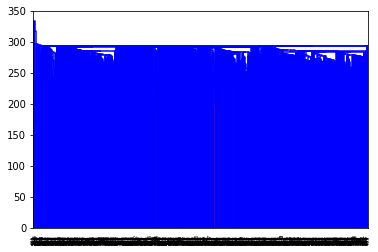

<Figure size 1440x1440 with 0 Axes>

In [38]:
linked = linkage(adj_mat_df.values, 'single')
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.figure(figsize=(20, 20))  
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering

input_n_clusters = len(G.nodes)
main_cluster_arr = []
col_counter = 0
while input_n_clusters > 16:
    print(input_n_clusters)
    cluster = AgglomerativeClustering(n_clusters=input_n_clusters, affinity='euclidean', linkage='ward')
    cluster_result = cluster.fit_predict(adj_mat_df.values)
    
    cluster_result_arr = []
    cluster_counter = 0
    for element in cluster_result:
        #print(element)
        cluster_result_arr.append(element)
    
    main_cluster_arr.append(cluster_result_arr)
    input_n_clusters = input_n_clusters // 2
    col_counter += 1



979
489
244
122
61
30


In [106]:
cluster_df = pd.DataFrame(main_cluster_arr)



In [107]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = test[test.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 979 columns]


In [108]:
cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,978
0,923,869,494,875,766,723,701,771,745,709,...,57,28,12,5,4,13,6,1,2,0
1,461,26,10,2,143,361,350,173,24,117,...,468,467,432,215,375,466,232,360,437,425
2,30,54,90,24,71,180,2,173,50,117,...,59,59,2,2,5,59,59,104,2,2
3,7,54,5,49,35,27,5,86,0,0,...,5,5,5,5,5,5,5,5,5,5
4,3,11,20,20,17,27,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [109]:
cluster_df = cluster_df.transpose()
cluster_df.head()

,0,1,2,3,4,5
0,923,461,30,7,3,10
1,869,26,54,54,11,10
2,494,10,90,5,20,0
3,875,2,24,49,20,0
4,766,143,71,35,17,0


In [110]:
var_df.head()
len(var_df['name'].unique())

1106

In [111]:
temp_col = []
for i in range(col_counter):
    temp_col.append((str("iteration_" + str(i))))
print(temp_col)

['iteration_0', 'iteration_1', 'iteration_2', 'iteration_3', 'iteration_4', 'iteration_5']


In [112]:
cluster_df.columns = temp_col
cluster_df.head()

,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5
0,923,461,30,7,3,10
1,869,26,54,54,11,10
2,494,10,90,5,20,0
3,875,2,24,49,20,0
4,766,143,71,35,17,0


In [121]:
## Get the max of each column and add it to the next column
for i in range(col_counter):
    if i == 0:
        pass
    else:
        #print(str(cluster_df[str("iteration_" + str(i))]))
        
        cluster_df[str("iteration_" + str(i))] = cluster_df[str("iteration_" + str(i))] + cluster_df[str("iteration_" + str(i-1))].max()

In [122]:
cluster_df['initial'] = var_df['name']

In [131]:
## Important
## Because we are doing bottom up approach, so when combining the string, it should be from the last column to the first column

cluster_df['cluster'] = cluster_df['iteration_5'].map(str) + '/' + cluster_df['iteration_4'].map(str) + '/' +cluster_df['iteration_3'].map(str) + '/' + cluster_df['iteration_2'].map(str) + '/' + cluster_df['iteration_1'].map(str) + '/' + cluster_df['iteration_0'].map(str) 
                        #cluster_df['iteration_0'].map(str) + '/' + cluster_df['iteration_0'].map(str) +
                        #cluster_df['iteration_0'].map(str) + '/' + cluster_df['iteration_0'].map(str) +


In [132]:
cluster_df.sort_values('iteration_0').head(20)

,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,initial,cluster
978,0,1403,1468,1714,1850,1890,C:\Users\tanji\Desktop\spark-master\sql\hive-t...,1890/1850/1714/1468/1403/0
976,1,1338,1570,1714,1850,1890,C:\Users\tanji\Desktop\spark-master\sql\hive-t...,1890/1850/1714/1570/1338/1
977,2,1415,1468,1714,1850,1890,C:\Users\tanji\Desktop\spark-master\sql\hive-t...,1890/1850/1714/1468/1415/2
967,3,1113,1499,1725,1855,1916,C:\Users\tanji\Desktop\spark-master\sql\hive-t...,1916/1855/1725/1499/1113/3
973,4,1353,1471,1714,1850,1890,C:\Users\tanji\Desktop\spark-master\sql\hive-t...,1890/1850/1714/1471/1353/4
972,5,1193,1468,1714,1850,1890,C:\Users\tanji\Desktop\spark-master\sql\hive-t...,1890/1850/1714/1468/1193/5
975,6,1210,1525,1714,1850,1890,C:\Users\tanji\Desktop\spark-master\sql\hive-t...,1890/1850/1714/1525/1210/6
956,7,1123,1538,1727,1850,1890,C:\Users\tanji\Desktop\spark-master\sql\hive-t...,1890/1850/1727/1538/1123/7
965,8,1036,1524,1714,1850,1890,C:\Users\tanji\Desktop\spark-master\sql\hive-t...,1890/1850/1714/1524/1036/8
959,9,1300,1468,1714,1850,1890,C:\Users\tanji\Desktop\spark-master\sql\hive-t...,1890/1850/1714/1468/1300/9


In [138]:
#cluster_df['cluster']
#spark_results['variables']
cluster_dict = {}
cluster_dict_counter = 0
dict_array = []
for element in cluster_df['cluster']:
    element = element.split('/')
    #print(element)
    for value in element:
        if value not in cluster_dict:
            cluster_dict[value] = {}
            cluster_dict[value]['counter'] = cluster_dict_counter
            cluster_dict[value]['contains_array'] = []
            cluster_dict_counter += 1
    for i in range(len(element)-1):
        #print(element[i])
        #print(element[i+1])
        #print(i)
        if element[i+1] not in cluster_dict[element[i]]['contains_array']:
            cluster_dict[element[i]]['contains_array'].append(element[i+1])

In [139]:
#spark_results
print(cluster_dict_counter)
#print(len(main_dict['kvstore']['contains_array'][0]))
#for element in main_dict['kvstore']['contains_array']:
    #print(element)
#print((main_dict['kvstore']['contains_array'][0][0]))

cluster_dict['1890']['contains_array']

1920


['1850',
 '1847',
 '1830',
 '1854',
 '1836',
 '1843',
 '1886',
 '1834',
 '1869',
 '1859',
 '1856',
 '1874',
 '1864',
 '1860',
 '1842',
 '1837',
 '1876',
 '1844',
 '1878',
 '1881',
 '1884']

In [167]:
cluster_df['iteration_5'].max()

1919

In [205]:
## The final cluster has more clusters, hence assign them as individual clusters

## Creating rsf file
f = open('test_a.rsf', 'a')
#for i in range(cluster_dict_counter - main_dict_counter):
for i in range(1890 - 1037):
    string = "contain " + str(i + 1037 + 1) + " " + str(i + 1037 + 1) + "\n"
    f.write(string)

#f.write('test')
f.close()

In [199]:
cluster_dict_counter - main_dict_counter

882

In [148]:
test_counter = 0
for element in cluster_dict:
    #print(element)
    if len(cluster_dict[element]['contains_array']) > 0:
        test_counter += 1
        
print(test_counter)


test_counter = 0
for element in main_dict:
    #print(element)
    if len(main_dict[element]['contains_array']) > 1:
        test_counter += 1
        
print(test_counter)

942
82


In [140]:
## Creating rsf file
f = open('test_b.rsf', 'w')
for element in cluster_dict:
    #print(element)
    for value in cluster_dict[element]['contains_array']:
        #print(value)
        string = "contain " + str(element) + " " + str(value) + "\n"
        f.write(string)

#f.write('test')
f.close()

In [141]:
print(cluster_dict_counter)
print(main_dict_counter)

1920
1038


In [135]:
accuracy = []

for name, group in cluster_df.groupby(['iteration_1']):
    #print('Start')
    #print(name, group)
    temp_arr = []
    for index, row in group.iterrows():
        temp_arr.append(row['initial'])
    for i in range(len(temp_arr)-1):
        accuracy.append(jellyfish.jaro_distance(temp_arr[i], temp_arr[i+1]))


In [50]:
pd.DataFrame(accuracy).head()

,0
0,0.958324
1,0.856605
2,0.773141
3,0.750162
4,0.814999


In [51]:
a = 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\kvstore\\pom.xml'
b = 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\kvstore\\src'
jellyfish.jaro_distance(a, b)

0.9485174323884001

In [52]:
c = 'C:/Users/tanji/Desktop/FIT4003/spark-master\\common\\kvstore\\pom.xml'
d = 'C:/Users/tanji/Desktop/FIT4003/spark-master\\docs\\css\\bootstrap.min.css'
jellyfish.jaro_distance(c, d)

0.8575529733424471

In [53]:
from glob import glob
subdirectory = glob('C:/Users/tanji/Desktop/FIT4003/spark-master/*/*/*/*')
print(len(subdirectory))

0


In [54]:
subdirectory

[]

In [55]:
fuzz.ratio(['lolo', 'lol'])

IndexError: tuple index out of range

In [219]:
f = open('test_a.rsf', 'r')
object1_1 = []
object1_2 = []
for line in f:
    #print(line)
    line = line.replace('\n', '')
    line = line.split(' ')
    object1_1.append(line[1])
    object1_2.append(line[2])

In [220]:
f2 = open('test_b.rsf', 'r')
object2_1 = []
object2_2 = []
for line in f2:
    #print(line)
    line = line.replace('\n', '')
    line = line.split(' ') 
    object2_1.append(line[1])
    object2_2.append(line[2])

In [221]:
print(len(set(object1_1)))
print(len(set(object1_2)))

977
1890


In [222]:
print(len(set(object2_1)))
print(len(set(object2_2)))

942
1891


In [225]:
#object1_2